## 前面这个方法没有直接用geopandas方便，但有助于了解
## ogr对于点，线，面，多点，多线等定义

In [3]:
from osgeo import ogr, osr
import requests
import json
import matplotlib.pyplot as plt

In [34]:
def plot_shp(shp_path):
    data_source = ogr.Open(shp_path)
    layer = data_source.GetLayer(0)
    
    for feature in layer:
        geom = feature.GetGeometryRef()
#         print(geom.GetGeometryName())
        if geom.GetGeometryName() == 'POLYGON':
            # 对于POLYGON，直接遍历所有环
            for i in range(geom.GetGeometryCount()):
                ring = geom.GetGeometryRef(i)
                points = ring.GetPoints()
                x, y = zip(*points)
                plt.plot(x,y,'r')
        elif geom.GetGeometryName() == 'MULTIPOLYGON':
           # 对于MULTIPOLYGON，先遍历每个POLYGON，再遍历每个POLYGON的所有环
            for poly in range(geom.GetGeometryCount()):
                polygon = geom.GetGeometryRef(poly)
                for i in range(polygon.GetGeometryCount()):
                    ring = polygon.GetGeometryRef(i)
                    points = ring.GetPoints()
                    x, y = zip(*points)
                    plt.plot(x, y, 'r')
        elif geom.GetGeometryName() == 'LINESTRING':
                points = geom.GetPoints()
                if points:
                    x, y = zip(*points)
                    plt.plot(x,y,color='blue')
        elif geom.GetGeometryName() == 'MULTILINESTRING':
            for i in range(geom.GetGeometryCount()):
                line = geom.GetGeometryRef(i)
                if line:
                    points = line.GetPoints()
                    if points:
                        x, y = zip(*points)
                        plt.plot(x,y,color='blue')
        elif geom.GetGeometryName() == 'POINT':
            x, y = geom.GetX(), geom.GetY()
            plt.plot(x, y, 'ko')
        elif geom.GetGeometryName() == 'MULTIPOINT':
            for i in range(geom.GetGeometryCount()):
                pt = geom.GetGeometryRef(i)
                if pt:
                    x, y = pt.GetX(), pt.GetY()
                    plt.plot(x, y, 'ko')  # 'ko' 表示黑色的圆点
    
    # 显示图形
    plt.show()

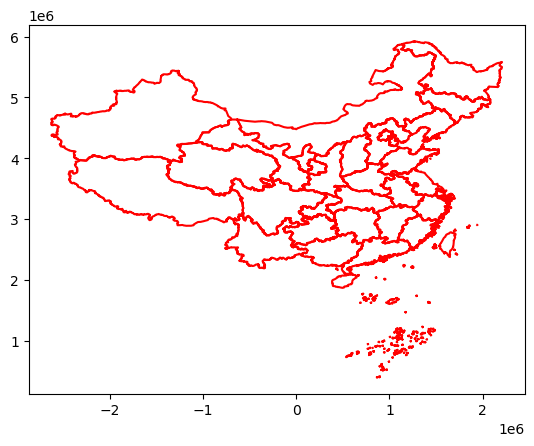

In [35]:
plot_shp(r'C:\GIS union python\data\2022年省界\sheng2022.shp')

## 直接用geopandas和matplotlib实现

In [41]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


<Axes: >

<Figure size 1000x1000 with 0 Axes>

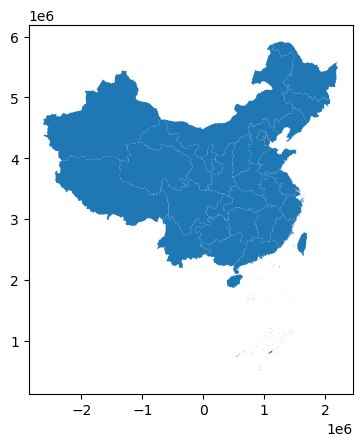

In [50]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf = gpd.read_file(r'C:\GIS union python\data\2022年省界\sheng2022.shp')
plt.figure(figsize=(10,10))
gdf.plot()


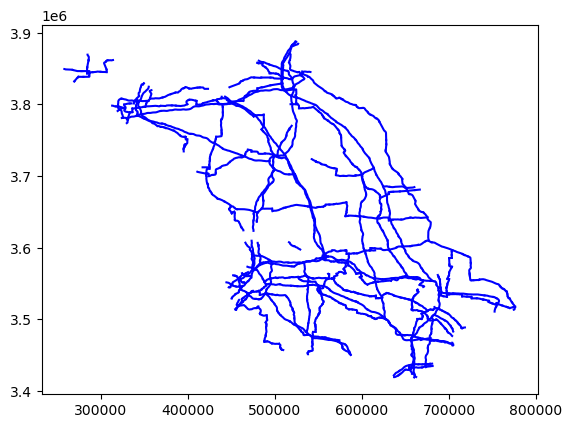

In [33]:
plot_shp(r'C:\GIS union python\data\江苏国道\JsGd.shp')

<Axes: >

<Figure size 1000x1000 with 0 Axes>

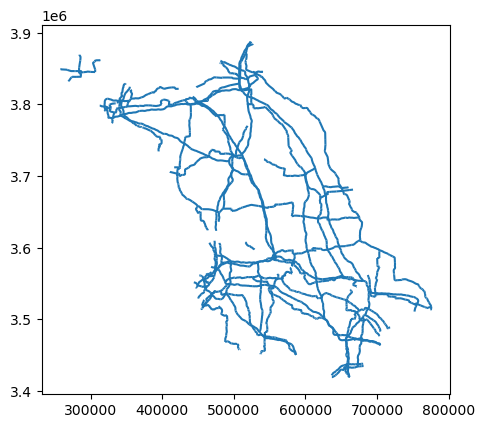

In [53]:
gdf = gpd.read_file(r'C:\GIS union python\data\江苏国道\JsGd.shp')
plt.figure(figsize=(10,10))
gdf.plot()